# Reference calculations

This is preloading code.

In [1]:
from data_provider import *
from solvers import prophecy 
from solvers.dummy.phrase_plugin import *
from solvers.dummy.hardcoded_in_file import *

print("Perfect data, test=brexit, train=asia_bibi")
test_provider = get_reversed_separated_data_for_language
ner = prophecy.ner
lemma = prophecy.lemma

Perfect data, test=brexit, train=asia_bibi


Comparision of Type0 with and without local-matching and without.

In [2]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common
import importlib
importlib.reload(fasttext_decorator)

res = common.compare_identifier_methods(
    ner = ner,
    lemma = lemma,
    NULL = {"identifier": null_solver.identifier},
    T0 = {"identifier": type0.identifier},
    T0_L = {"identifier": type0.identifier_with_localphrase},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res[0], res[1:])

/home/bartek/.local/lib/python3.6/site-packages/pywikibot/config2.py:1121: UserWarning: Configuration variable "use_api_login" is defined in your user-config.py but unknown. It can be a misspelled one or a variable that is no longer supported.
  .format(name), UserWarning)
  0%|          | 0/3 [00:00<?, ?it/s]

Loading lang  pl  for oracle
Keys:  dict_keys([])
function [lang_miss] finished in 0 min 0 s 5 ms
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Loading lang  cs  for oracle
Keys:  dict_keys(['pl'])
function [lang_miss] finished in 0 min 0 s 0 ms
Loading lang  ru  for oracle
Keys:  dict_keys(['pl', 'cs'])
function [lang_miss] finished in 0 min 0 s 0 ms
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements
Loading lang  bg  for oracle
Keys:  dict_keys(['pl', 'cs', 'ru'])
function [lang_miss] finished in 0 min 0 s 0 ms


 33%|███▎      | 1/3 [00:43<01:26, 43.29s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 


 67%|██████▋   | 2/3 [01:36<00:46, 46.23s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 


100%|██████████| 3/3 [02:29<00:00, 49.94s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 
NER cached:  7693/9222
Lemma cached:  7693/9222
function [compare_identifier_methods] finished in 2 min 29 s 889 ms

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |NULL     |0.422887 |0.756151 |26851    |0.293521 |26845    |Lea      |
All      |All      |T0       |0.567904 |0.787328 |26851    |0.444128 |26845    |Lea      |
All      |All      |T0_L     |0.585597 |0.787900 |26851    |0.465957 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT      |NULL     |0.935448 |0.948329 |2574     |0.922913 |2574     |Lea      |
All      |EVT      |T0       |0.935867 |0.948329 |2574     |0.923728 |2574     |Lea      |
All      |E

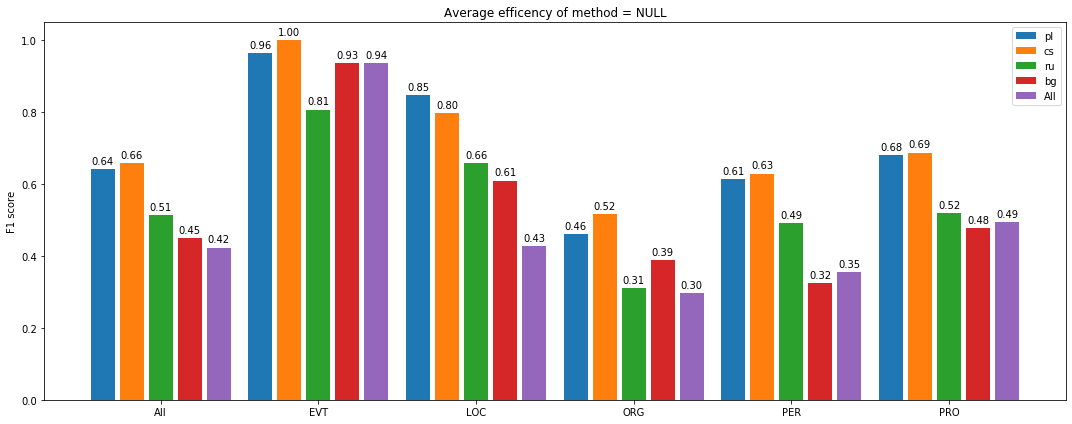

In [3]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res)

## Wikidata

In [3]:
from solvers.wikidatan import repository
gl_rep = repository.Repository(preload_dictionaries=True)

using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.PRO.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.PER.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.ORG.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.EVT.pickle  to apply them again
using recalculated wikidata file - threshold updates won't be applied. Remove  application_data/wikidata/cached.LOC.pickle  to apply them again


In [4]:
# optymalna konfiguracja obliczona ręcznie na samym dole notebook'a
opt_conf_fasttext = [{"lang": "pl", "cat": "EVT", "th": 0.95},
        {"lang": "pl", "cat": "LOC", "th": 0.95},
        {"lang": "pl", "cat": "ORG", "th": 0.95},
        {"lang": "cs", "cat": "EVT", "th": 0.9},
        {"lang": "cs", "cat": "LOC", "th": 0.9},
        {"lang": "cs", "cat": "ORG", "th": 0.9},
        {"lang": "ru", "cat": "EVT", "th": 0.9},
        {"lang": "ru", "cat": "ORG", "th": 0.9},
        {"lang": "ru", "cat": "PRO", "th": 0.7},
        {"lang": "bg", "cat": "EVT", "th": 0.9},
        {"lang": "bg", "cat": "ORG", "th": 0.75},
       ]

In [5]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
from data_provider import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common
from itertools import product 

sep_fixer = simplefixer.SeparateFixer(gl_rep, opt_conf_fasttext)
fx = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG"], enrich=False)

res2 = common.compare_identifier_methods(
    ner = ner,
    lemma = lemma,
    H_RAW = {"identifier": identifier.Type1Identifier()},
    WH = {"identifier": identifier.Identifier(gl_rep)},
    WH_F = {"identifier": identifier.Identifier(gl_rep), 
            "answer_fixer": sep_fixer},
    BSNLP = {"identifier": identifier.Identifier(gl_rep), 
               "answer_fixer": simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG"], enrich=False)
              },
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res2[0], res2[1:])

 25%|██▌       | 1/4 [00:41<02:04, 41.54s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Type1Identifier'>
Got exception 


 50%|█████     | 2/4 [26:47<16:37, 498.79s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
[SeparateFixer] start processing  pl EVT


  v1 = v1 / np.linalg.norm(v1)


simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 46/46 [00:01<00:00, 26.51it/s][A

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

[SeparateFixer] end processing  pl EVT
[SeparateFixer] start processing  pl LOC



simple fixer: 100%|██████████| 396/396 [02:02<00:00,  3.24it/s] 

simple fixer:   0%|          | 1/579 [00:00<01:12,  7.92it/s]

[SeparateFixer] end processing  pl LOC
[SeparateFixer] start processing  pl ORG



simple fixer: 100%|██████████| 579/579 [01:27<00:00,  6.64it/s] 


[SeparateFixer] end processing  pl ORG
[SeparateFixer] start processing  cs EVT
removing element from fasttext cache



simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 14/14 [00:00<00:00, 52.65it/s][A

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

[SeparateFixer] end processing  cs EVT
[SeparateFixer] start processing  cs LOC



simple fixer: 100%|██████████| 152/152 [00:14<00:00, 10.36it/s]

simple fixer:   0%|          | 0/231 [00:00<?, ?it/s]

[SeparateFixer] end processing  cs LOC
[SeparateFixer] start processing  cs ORG



simple fixer: 100%|██████████| 231/231 [00:09<00:00, 25.38it/s]


[SeparateFixer] end processing  cs ORG
[SeparateFixer] start processing  ru EVT
removing element from fasttext cache



simple fixer:   0%|          | 0/37 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 37/37 [00:00<00:00, 111.97it/s]A

simple fixer:   0%|          | 0/168 [00:00<?, ?it/s]

[SeparateFixer] end processing  ru EVT
[SeparateFixer] start processing  ru ORG



simple fixer: 100%|██████████| 168/168 [00:06<00:00, 26.75it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 321.42it/s]


[SeparateFixer] end processing  ru ORG
[SeparateFixer] start processing  ru PRO
[SeparateFixer] end processing  ru PRO
[SeparateFixer] start processing  bg EVT
removing element from fasttext cache



simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 31/31 [00:01<00:00, 26.50it/s]


[SeparateFixer] end processing  bg EVT
[SeparateFixer] start processing  bg ORG



simple fixer: 100%|██████████| 264/264 [00:55<00:00,  4.75it/s] 


[SeparateFixer] end processing  bg ORG



simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

[SeparateFixer] start processing  pl EVT



simple fixer: 100%|██████████| 46/46 [00:01<00:00, 27.63it/s][A

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

[SeparateFixer] end processing  pl EVT
[SeparateFixer] start processing  pl LOC



simple fixer: 100%|██████████| 396/396 [01:58<00:00,  3.33it/s] 

simple fixer:   0%|          | 1/579 [00:00<01:16,  7.58it/s]

[SeparateFixer] end processing  pl LOC
[SeparateFixer] start processing  pl ORG



simple fixer: 100%|██████████| 579/579 [01:26<00:00,  6.69it/s] 


[SeparateFixer] end processing  pl ORG



simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

[SeparateFixer] start processing  cs EVT



simple fixer: 100%|██████████| 14/14 [00:00<00:00, 52.47it/s][A

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

[SeparateFixer] end processing  cs EVT
[SeparateFixer] start processing  cs LOC



simple fixer: 100%|██████████| 152/152 [00:14<00:00, 10.23it/s]

simple fixer:   0%|          | 0/231 [00:00<?, ?it/s]

[SeparateFixer] end processing  cs LOC
[SeparateFixer] start processing  cs ORG



simple fixer: 100%|██████████| 231/231 [00:09<00:00, 25.02it/s]


[SeparateFixer] end processing  cs ORG



simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

[SeparateFixer] start processing  bg EVT



simple fixer: 100%|██████████| 31/31 [00:01<00:00, 26.11it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

[SeparateFixer] end processing  bg EVT
[SeparateFixer] start processing  bg ORG



simple fixer: 100%|██████████| 264/264 [00:55<00:00,  4.80it/s] 


[SeparateFixer] end processing  bg ORG



simple fixer:   0%|          | 0/37 [00:00<?, ?it/s]

[SeparateFixer] start processing  ru EVT



simple fixer: 100%|██████████| 37/37 [00:00<00:00, 105.97it/s]A

simple fixer:   0%|          | 0/168 [00:00<?, ?it/s]

[SeparateFixer] end processing  ru EVT
[SeparateFixer] start processing  ru ORG



simple fixer: 100%|██████████| 168/168 [00:06<00:00, 26.63it/s][A

simple fixer:  17%|█▋        | 10/59 [00:00<00:00, 97.67it/s]

[SeparateFixer] end processing  ru ORG
[SeparateFixer] start processing  ru PRO


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 291.36it/s]


[SeparateFixer] end processing  ru PRO


 75%|███████▌  | 3/4 [50:11<12:50, 770.30s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 
removing element from fasttext cache



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 579/579 [01:25<00:00,  6.77it/s] 


removing element from fasttext cache



simple fixer:   0%|          | 0/231 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 231/231 [00:08<00:00, 25.70it/s]


removing element from fasttext cache



simple fixer:   0%|          | 0/168 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 168/168 [00:06<00:00, 26.72it/s][A


removing element from fasttext cache



simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Using stripped file



simple fixer: 100%|██████████| 264/264 [00:55<00:00,  4.72it/s] 

simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 579/579 [01:26<00:00,  6.70it/s] 

simple fixer:   0%|          | 0/231 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 231/231 [00:08<00:00, 25.71it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



simple fixer: 100%|██████████| 264/264 [00:55<00:00,  4.74it/s] 

simple fixer:   0%|          | 0/168 [00:00<?, ?it/s]

removing element from fasttext cache
Using stripped file



100%|██████████| 4/4 [1:08:52<00:00, 1033.22s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SimpleFixer'>
Got exception 
NER cached:  10767/12296
Lemma cached:  10767/12296
function [compare_identifier_methods] finished in 68 min 53 s 668 ms

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |BSNLP    |0.469711 |0.793743 |26851    |0.333546 |26845    |Lea      |
All      |All      |H_RAW    |0.494072 |0.811530 |26851    |0.355145 |26845    |Lea      |
All      |All      |WH       |0.456410 |0.810414 |26851    |0.317653 |26845    |Lea      |
All      |All      |WH_F     |0.489750 |0.793179 |26851    |0.354237 |26845    |Lea      |
----------------------------------

# Wykresy porównawcze

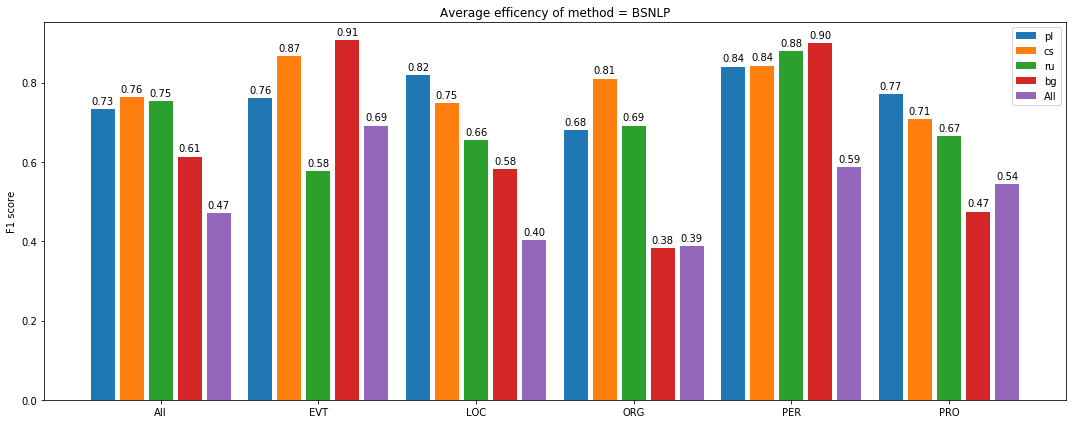

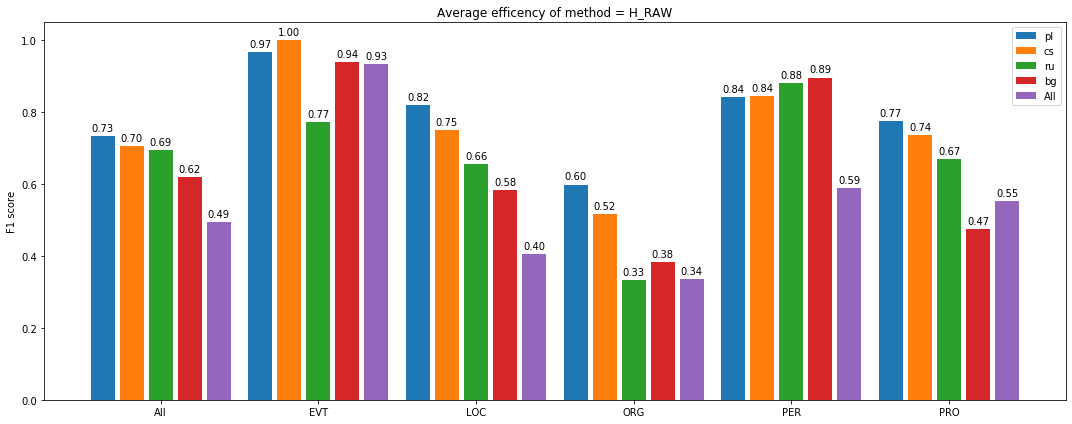

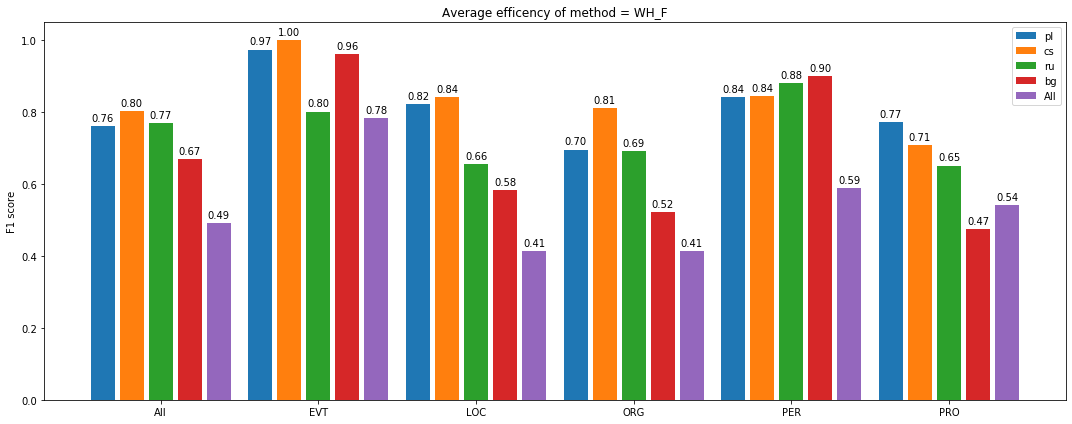

In [7]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res2)

In [8]:
# from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
# from solvers.fixers import simplefixer
# from solvers.wikidatan import identifier
# from metrics import mentions_catch, lea
# from collections import defaultdict
# from solvers.dummy.hardcoded_in_file import *
# from solvers.dummy.phrase_plugin import *
# from solvers.dummy.lemma_plugin import *
# from data_provider import *
# import visualize
# import fasttext_decorator
# from polyglot_decorator import *
# from solvers import null_solver
# import common
# fixer = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
# res = common.compare_methods(
#     T0 = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier},
#     WH_FML = {"ner": ner, "lemmatizer": lemma, 
#               "identifier": identifier.Identifier(gl_rep), 
#                "crosslang_answer_fixer": simplefixer.MulitLangWrapper(fixer)
#               },
#     test_provider = test_provider,
#     metric_factory=lambda:lea.Lea(exact=True)
# )
# visualize.summarize_results(res[0], res[1:])

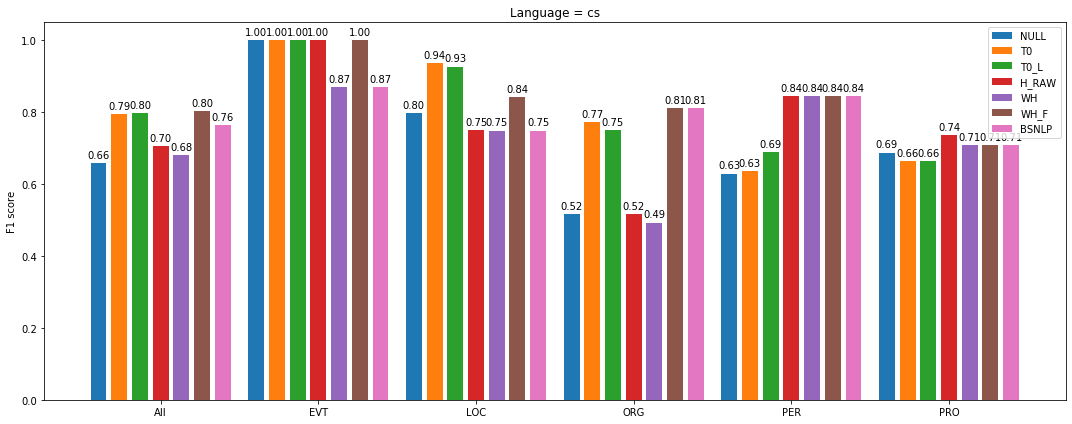

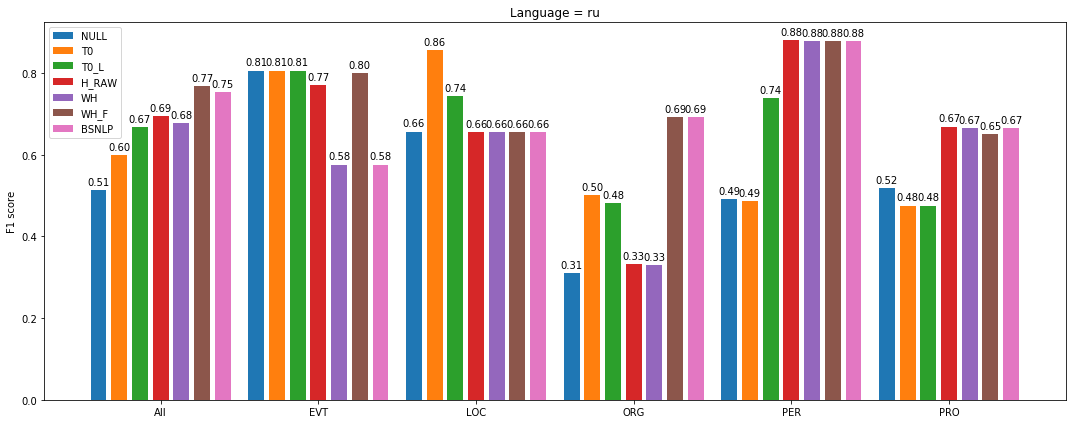

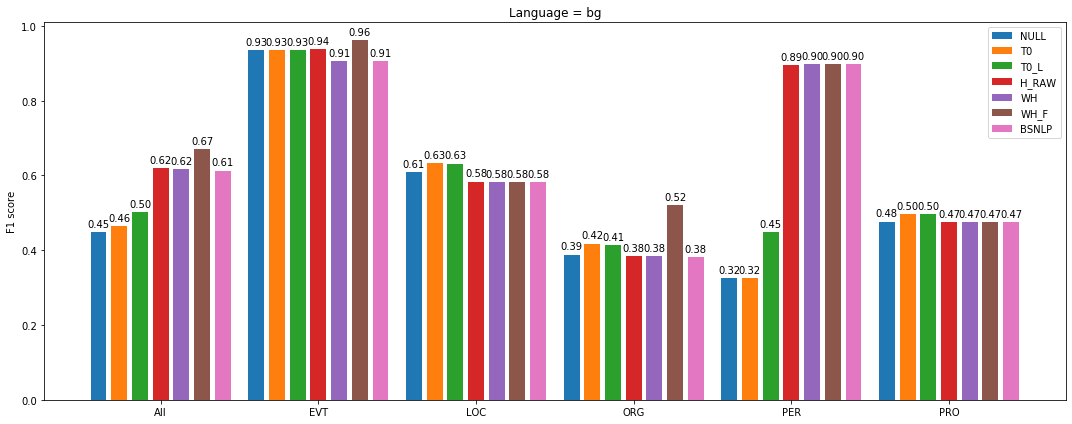

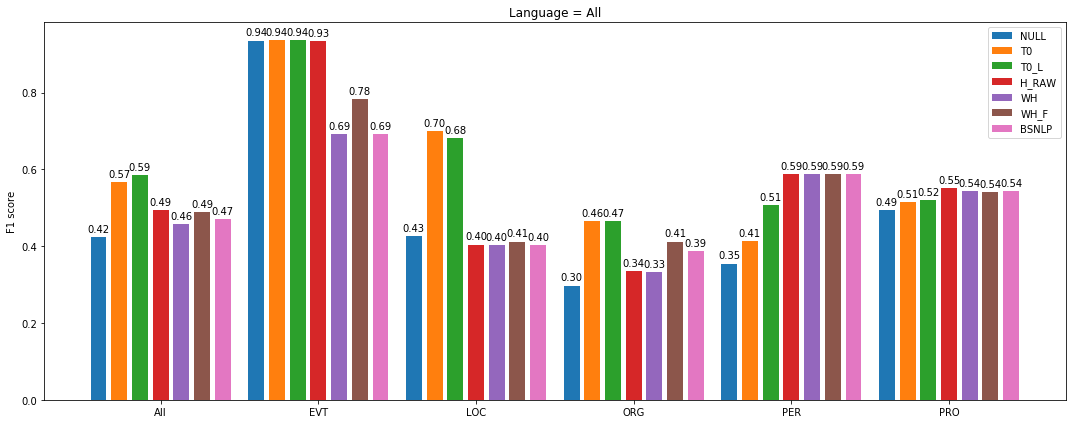

In [9]:
from visualize import visualize_compare_methods
# x = print(res + res2)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res if y[0] == sel_lang]
    x2 = [y for y in res2 if y[0] == sel_lang and y[2] != "T0"]
#     print(x[0])
#     print(x2[0])
    visualize_compare_methods(sel_lang, x+x2)

In [ ]:
from visualize import visualize_compare_methods
# x = print(res + res2)
for sel_lang in ["All"]:
    x = [y for y in res if y[0] == sel_lang and y[2] in ["WH", "WH_F"]]
    x2 = [y for y in res2 if y[0] == sel_lang and y[2] != "T0" and y[2] in ["WH", "WH_F"]]
#     print(x[0])
#     print(x2[0])
    visualize_compare_methods(sel_lang, x+x2)

[('pl', 'All~WH', 'F1', 0.7090944333269404, 0.8818167740486104, 10914, 0.5929522735895888, 10914, 'Lea'), ('pl', 'All~WH', 'PREC', 0.8818167740486104, 0.8818167740486104, 10914, 0.5929522735895888, 10914, 'Lea'), ('pl', 'All~WH', 'REC', 0.5929522735895888, 0.8818167740486104, 10914, 0.5929522735895888, 10914, 'Lea'), ('pl', 'All~WH_F', 'F1', 0.7600507860487109, 0.8709325277841109, 10914, 0.674214026917389, 10914, 'Lea'), ('pl', 'All~WH_F', 'PREC', 0.8709325277841109, 0.8709325277841109, 10914, 0.674214026917389, 10914, 'Lea')]


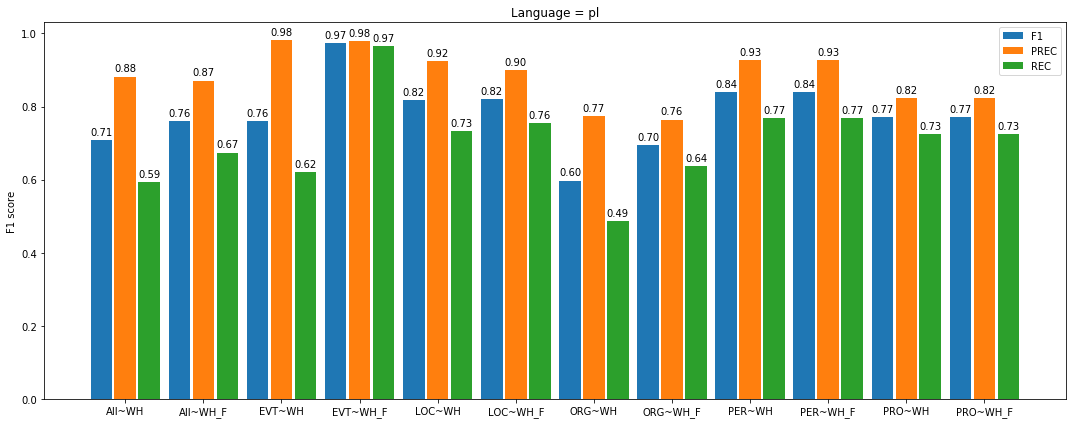

[('cs', 'All~WH', 'F1', 0.6801849534105983, 0.8458625662584219, 4109, 0.5687791766517892, 4107, 'Lea'), ('cs', 'All~WH', 'PREC', 0.8458625662584219, 0.8458625662584219, 4109, 0.5687791766517892, 4107, 'Lea'), ('cs', 'All~WH', 'REC', 0.5687791766517892, 0.8458625662584219, 4109, 0.5687791766517892, 4107, 'Lea'), ('cs', 'All~WH_F', 'F1', 0.8022666693642692, 0.8880172642502508, 4109, 0.7316185744310427, 4107, 'Lea'), ('cs', 'All~WH_F', 'PREC', 0.8880172642502508, 0.8880172642502508, 4109, 0.7316185744310427, 4107, 'Lea')]


[('ru', 'All~WH', 'F1', 0.6782291465480028, 0.878580669815223, 3192, 0.5522858819885257, 3186, 'Lea'), ('ru', 'All~WH', 'PREC', 0.878580669815223, 0.878580669815223, 3192, 0.5522858819885257, 3186, 'Lea'), ('ru', 'All~WH', 'REC', 0.5522858819885257, 0.878580669815223, 3192, 0.5522858819885257, 3186, 'Lea'), ('ru', 'All~WH_F', 'F1', 0.7686028750909792, 0.8551068310561676, 3192, 0.6979928203018776, 3186, 'Lea'), ('ru', 'All~WH_F', 'PREC', 0.8551068310561676, 0.8551068310561676, 3192, 0.6979928203018776, 3186, 'Lea')]


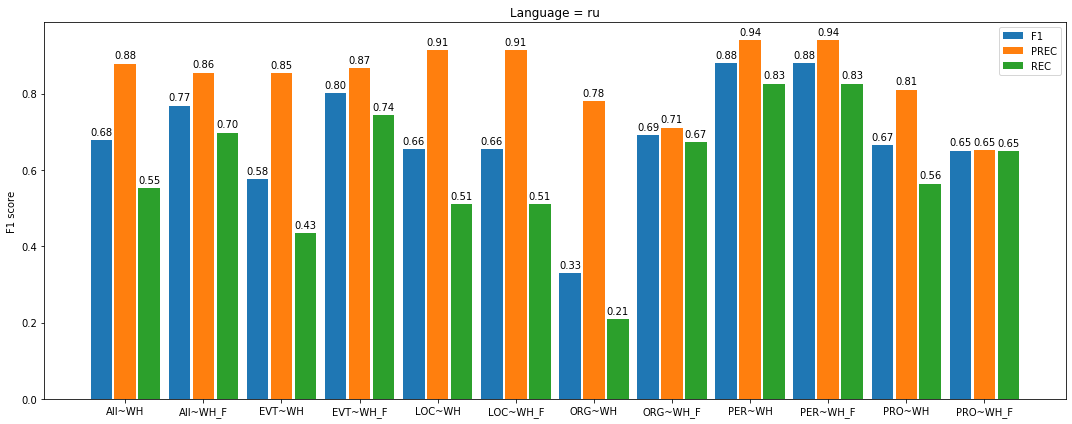

[('bg', 'All~WH', 'F1', 0.6160717169765895, 0.7367422713897122, 8636, 0.5293670241978221, 8636, 'Lea'), ('bg', 'All~WH', 'PREC', 0.7367422713897122, 0.7367422713897122, 8636, 0.5293670241978221, 8636, 'Lea'), ('bg', 'All~WH', 'REC', 0.5293670241978221, 0.7367422713897122, 8636, 0.5293670241978221, 8636, 'Lea'), ('bg', 'All~WH_F', 'F1', 0.6697617187048566, 0.7078130275147818, 8636, 0.6355928910155139, 8636, 'Lea'), ('bg', 'All~WH_F', 'PREC', 0.7078130275147818, 0.7078130275147818, 8636, 0.6355928910155139, 8636, 'Lea')]


[('All', 'All~WH', 'F1', 0.45677600333556995, 0.8102004253652887, 26851, 0.318040743997199, 26843, 'Lea'), ('All', 'All~WH', 'PREC', 0.8102004253652887, 0.8102004253652887, 26851, 0.318040743997199, 26843, 'Lea'), ('All', 'All~WH', 'REC', 0.318040743997199, 0.8102004253652887, 26851, 0.318040743997199, 26843, 'Lea'), ('All', 'All~WH_F', 'F1', 0.4898149493925912, 0.7935838382562778, 26851, 0.35422450591110854, 26843, 'Lea'), ('All', 'All~WH_F', 'PREC', 0.7935838382562778, 0.7935838382562778, 26851, 0.35422450591110854, 26843, 'Lea')]


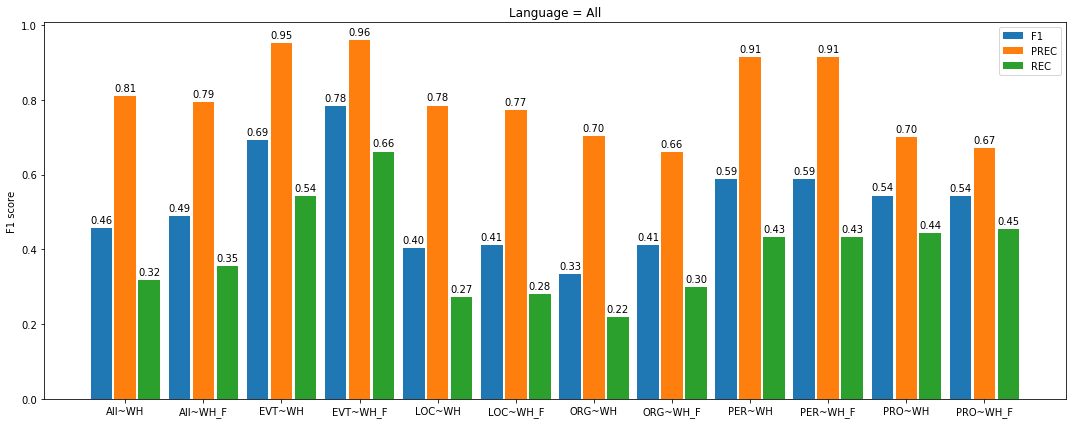

In [11]:
from visualize import visualize_compare_methods
import importlib
importlib.reload(visualize)
# x = print(res + res2)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res + res2 if y[0] == sel_lang and y[2] in ["WH", "WH_F"]]
    f1 = [(y[0], y[1]+"~"+y[2], "F1", y[3], y[4], y[5], y[6], y[7], y[8]) for y in x]
    prec = [(y[0], y[1]+"~"+y[2], "PREC", y[4], y[4], y[5], y[6], y[7], y[8]) for y in x]
    rec = [(y[0], y[1]+"~"+y[2], "REC", y[6], y[4], y[5], y[6], y[7], y[8]) for y in x]
    t = sorted(f1+prec+rec)
    print(t[0:5])
    visualize_compare_methods(sel_lang, t)

defaultdict(<function SeparateFixer.__init__.<locals>.<lambda> at 0x7f69fc0e11e0>, {'pl_EVT': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a256abd90>, {'fasttext_hit': 2174, 'fasttext_total_words': 2352, 'total_mentions': 2138, 'change_mentions': 470, 'sum_words': 2352}), 'pl': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a2626ed08>, {'total_keys': 2042, 'sum_similarity': nan, 'num_similiarity': 19966110, 'total_merges': 246}), 'pl_LOC': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a2626ebf8>, {'fasttext_hit': 4882, 'fasttext_total_words': 9616, 'total_mentions': 7032, 'change_mentions': 532, 'sum_words': 9616}), 'pl_ORG': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a24b3e840>, {'fasttext_hit': 7446, 'fasttext_total_words': 10416, 'total_mentions': 6110, 'change_mentions': 1120, 'sum_words': 10416}), 'cs_EVT': d

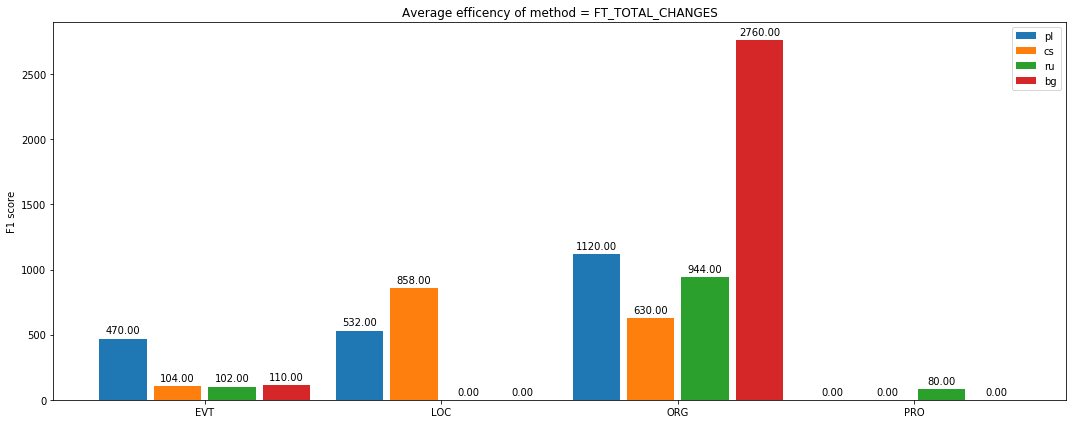

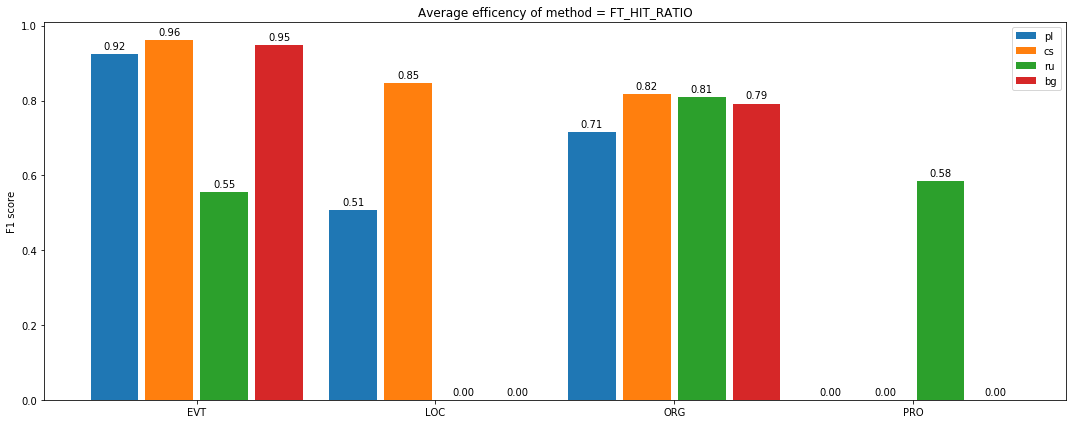

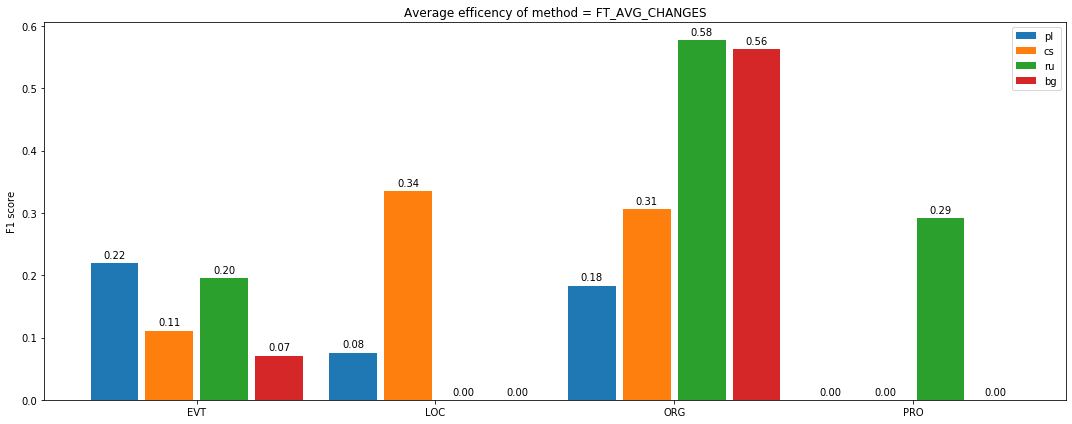

defaultdict(<function SeparateFixer.__init__.<locals>.<lambda> at 0x7f69fc0e11e0>, {'pl_EVT': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a256abd90>, {'fasttext_hit': 2174, 'fasttext_total_words': 2352, 'total_mentions': 2138, 'change_mentions': 470, 'sum_words': 2352}), 'pl': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a2626ed08>, {'total_keys': 2042, 'sum_similarity': nan, 'num_similiarity': 19966110, 'total_merges': 246}), 'pl_LOC': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a2626ebf8>, {'fasttext_hit': 4882, 'fasttext_total_words': 9616, 'total_mentions': 7032, 'change_mentions': 532, 'sum_words': 9616}), 'pl_ORG': defaultdict(<function SeparateFixer.__init__.<locals>.<lambda>.<locals>.<lambda> at 0x7f6a24b3e840>, {'fasttext_hit': 7446, 'fasttext_total_words': 10416, 'total_mentions': 6110, 'change_mentions': 1120, 'sum_words': 10416}), 'cs_EVT': d

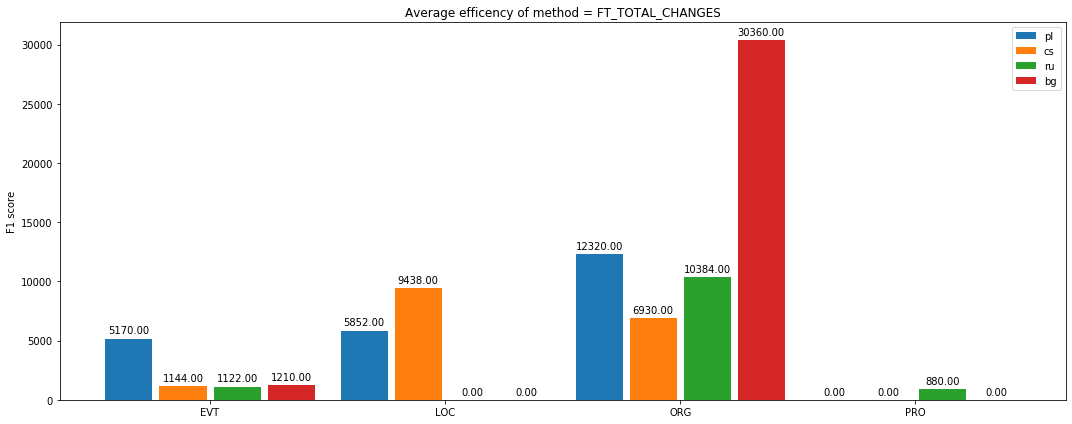

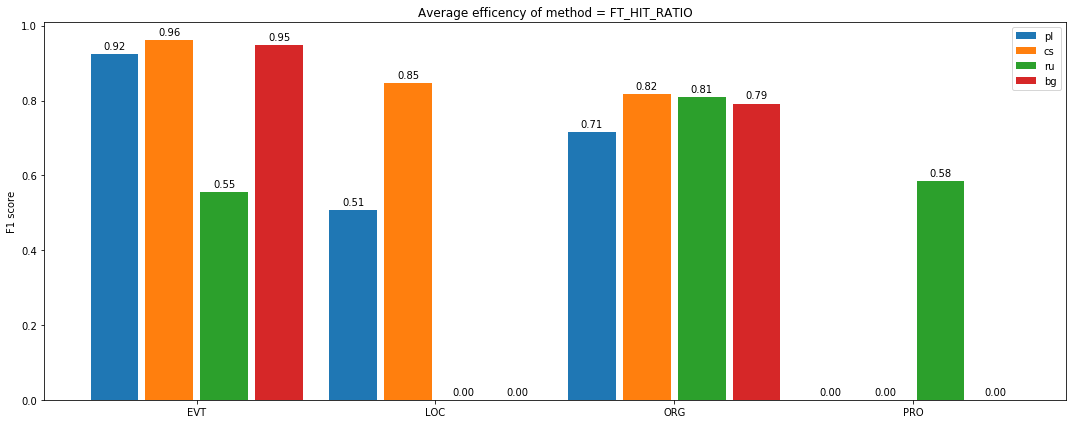

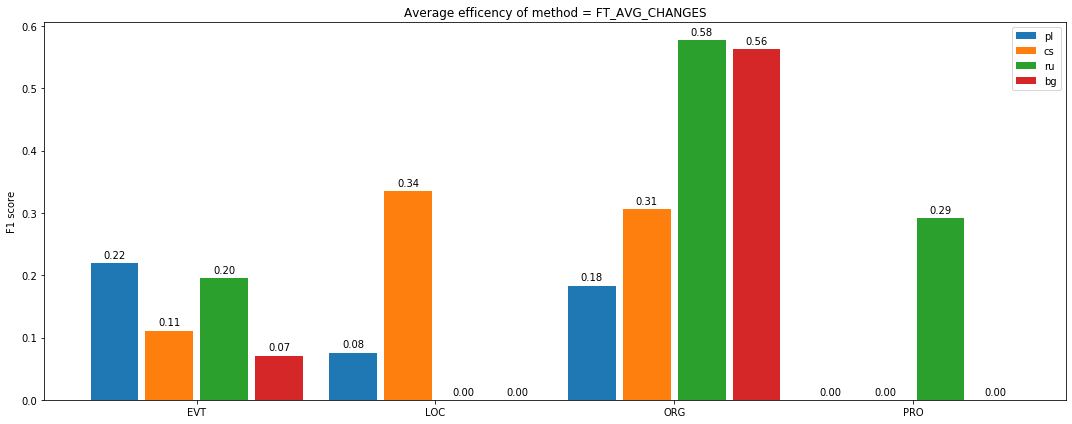

In [12]:
import importlib
importlib.reload(simplefixer)
importlib.reload(visualize)
def print_stats(statistics):
    m = [('Lang', 'Category', 'Method', 'F1', 'PRECIS', 'P[NUM]', 'RECALL', 'R[NUM]', 'metric')]
    for key, value in statistics.items():
        if "_" in key:
            l, cat = key.split("_")
#             print(key, "FastText Average Word Hit", value["fasttext_hit"]/value["fasttext_total_words"], value["fasttext_hit"], value["fasttext_total_words"])
#             print(key, "Word number average", value["sum_words"] / value["total_mentions"], value["sum_words"], value["total_mentions"])
#             print(key, "Change mentions", value["change_mentions"] / value["total_mentions"], value["change_mentions"], value["total_mentions"])
            m += [(l, cat, "FT_HIT_RATIO", value["fasttext_hit"]/value["fasttext_total_words"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "AVG_WORD_NUM", value["sum_words"] / value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_AVG_CHANGES", value["change_mentions"]/value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_TOTAL_CHANGES", value["change_mentions"], 1.0,1,1.0,1, "X")]
#         (value["fasttext_hit"]/value["fasttext_total_words"], value["sum_words"] / value["total_mentions"],  value["change_mentions"] / value["total_mentions"])
#     l = "ru"
#     cat = "EVT"
#     m += [(l, cat, "FT_HIT_RATIO", 0, 1.0,1,1.0,1, "X")]
#     m += [(l, cat, "AVG_WORD_NUM", 0, 1.0,1,1.0,1, "X")]
#     m += [(l, cat, "FT_AVG_CHANGES", 0, 1.0,1,1.0,1, "X")]
#     m += [(l, cat, "FT_TOTAL_CHANGES", 0, 1.0,1,1.0,1, "X")]
    return m

print(sep_fixer.statistics)
x = print_stats(sep_fixer.statistics)
visualize_multiple_categories(x)

from collections import defaultdict
print(sep_fixer.statistics)
d = defaultdict(lambda:defaultdict(lambda:0))
for _, f2 in sep_fixer.fixers.items():
    for _, f in f2.items():
        for l_cat, stat_dict in f.statistics.items():
            if l_cat != None:
                for k, v in stat_dict.items():
                    d[l_cat][k] += v if k != None else 0
x = print_stats(d)
visualize_multiple_categories(x)
#UWAGA! 0 pojawiają się dla kategorii, których nie poprawiamy! To nie oznacza, że nie mamy słów dla danej kategorii w fasttext

In [13]:
from visualize import visualize_compare_methods
importlib.reload(visualize)
visualize_compare_methods("All", x, plot_width=20, selected_methods=["NULL", "WH"]) 

[]


ZeroDivisionError: float division by zero

# Porównanie metod

In [6]:
from visualize import visualize_compare_methods
import importlib
importlib.reload(visualize)
def compare_methods(r, langs = ["pl", "cs", "ru", "bg", "All"], methods = ["WH", "WH_F"]):
# x = print(res + res2)
    for sel_lang in langs:
        x = [y for y in r if y[0] == sel_lang and y[2] in methods]
        f1 = [(y[0], y[1]+"~"+y[2], "F1", y[3], y[4], y[5], y[6], y[7], y[8]) for y in x]
        prec = [(y[0], y[1]+"~"+y[2], "PREC", y[4], y[4], y[5], y[6], y[7], y[8]) for y in x]
        rec = [(y[0], y[1]+"~"+y[2], "REC", y[6], y[4], y[5], y[6], y[7], y[8]) for y in x]
        t = sorted(f1+prec+rec)
        visualize.summarize_results(res[0], t)
        visualize_compare_methods(sel_lang, t, title="Brexit, Language = ")
        t2 = sorted([(y[0], y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]) for y in x])
        visualize_compare_methods(sel_lang, t2, title="Brexit, Language = ")


Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All~NULL |F1       |0.422887 |0.756151 |26851    |0.293521 |26845    |Lea      |
All      |All~NULL |PREC     |0.756151 |0.756151 |26851    |0.293521 |26845    |Lea      |
All      |All~NULL |REC      |0.293521 |0.756151 |26851    |0.293521 |26845    |Lea      |
--------------------------------------------------------------
All      |All~T0   |F1       |0.567904 |0.787328 |26851    |0.444128 |26845    |Lea      |
All      |All~T0   |PREC     |0.787328 |0.787328 |26851    |0.444128 |26845    |Lea      |
All      |All~T0   |REC      |0.444128 |0.787328 |26851    |0.444128 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT~NULL |F1       |0.935448 |0.948329 |2574     |0.922913 |2574     |Lea      |
All      |EVT~NULL |PREC     |0.948329 |0.948329 |2574     |0.922913 |2574     |Le

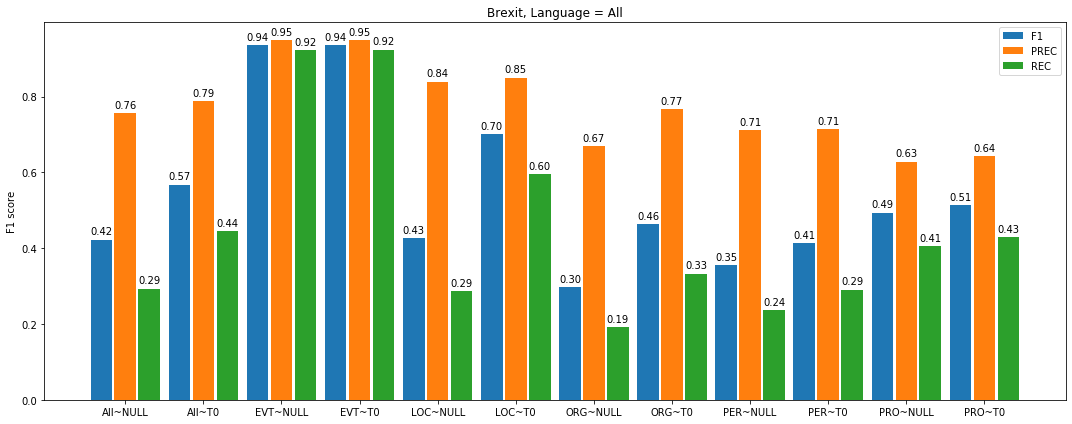

In [7]:
#Rozdział 4.3.2
compare_methods(res+res2, langs=["All"], methods=["NULL", "T0"])


Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All~NULL |F1       |0.422887 |0.756151 |26851    |0.293521 |26845    |Lea      |
All      |All~NULL |PREC     |0.756151 |0.756151 |26851    |0.293521 |26845    |Lea      |
All      |All~NULL |REC      |0.293521 |0.756151 |26851    |0.293521 |26845    |Lea      |
--------------------------------------------------------------
All      |All~T0_L |F1       |0.585597 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |PREC     |0.787900 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |REC      |0.465957 |0.787900 |26851    |0.465957 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT~NULL |F1       |0.935448 |0.948329 |2574     |0.922913 |2574     |Lea      |
All      |EVT~NULL |PREC     |0.948329 |0.948329 |2574     |0.922913 |2574     |Le

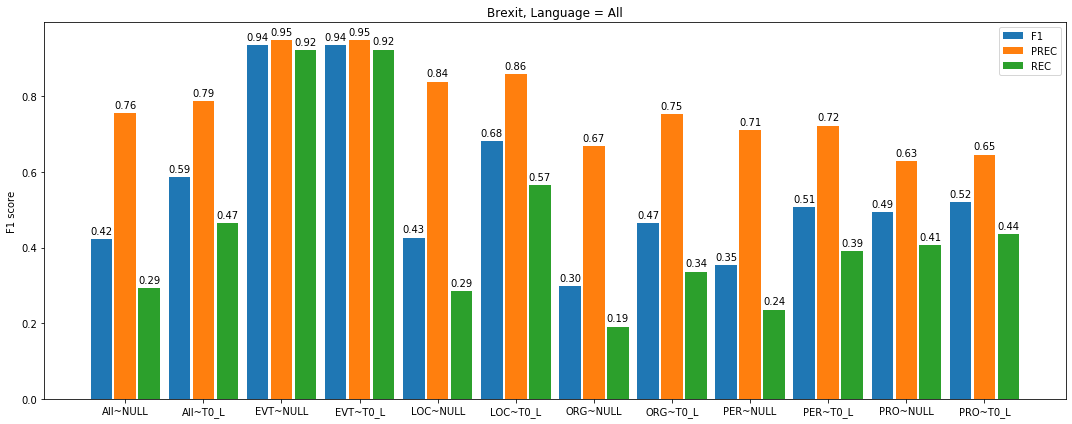

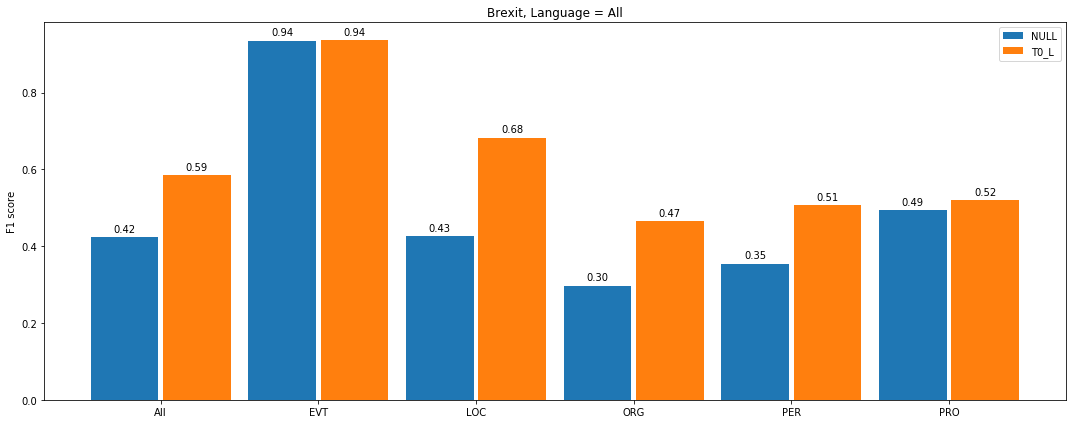

In [8]:
#Rozdział 4.3.3
compare_methods(res+res2, langs=["All"], methods=["T0_L", "NULL"])

In [9]:
#Rozdział 4.3.7
compare_methods(res+res2, langs=["All"], methods=["H_RAW", "T0_L"])


Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All~H_RAW |F1       |0.494072 |0.811530 |26851    |0.355145 |26845    |Lea      |
All      |All~H_RAW |PREC     |0.811530 |0.811530 |26851    |0.355145 |26845    |Lea      |
All      |All~H_RAW |REC      |0.355145 |0.811530 |26851    |0.355145 |26845    |Lea      |
--------------------------------------------------------------
All      |All~T0_L |F1       |0.585597 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |PREC     |0.787900 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |REC      |0.465957 |0.787900 |26851    |0.465957 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT~H_RAW |F1       |0.933553 |0.950602 |2574     |0.917106 |2576     |Lea      |
All      |EVT~H_RAW |PREC     |0.950602 |0.950602 |2574     |0.917106 |2576   


Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All~T0_L |F1       |0.585597 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |PREC     |0.787900 |0.787900 |26851    |0.465957 |26845    |Lea      |
All      |All~T0_L |REC      |0.465957 |0.787900 |26851    |0.465957 |26845    |Lea      |
--------------------------------------------------------------
All      |All~WH   |F1       |0.456410 |0.810414 |26851    |0.317653 |26845    |Lea      |
All      |All~WH   |PREC     |0.810414 |0.810414 |26851    |0.317653 |26845    |Lea      |
All      |All~WH   |REC      |0.317653 |0.810414 |26851    |0.317653 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT~T0_L |F1       |0.935867 |0.948329 |2574     |0.923728 |2574     |Lea      |
All      |EVT~T0_L |PREC     |0.948329 |0.948329 |2574     |0.923728 |2574     |Le

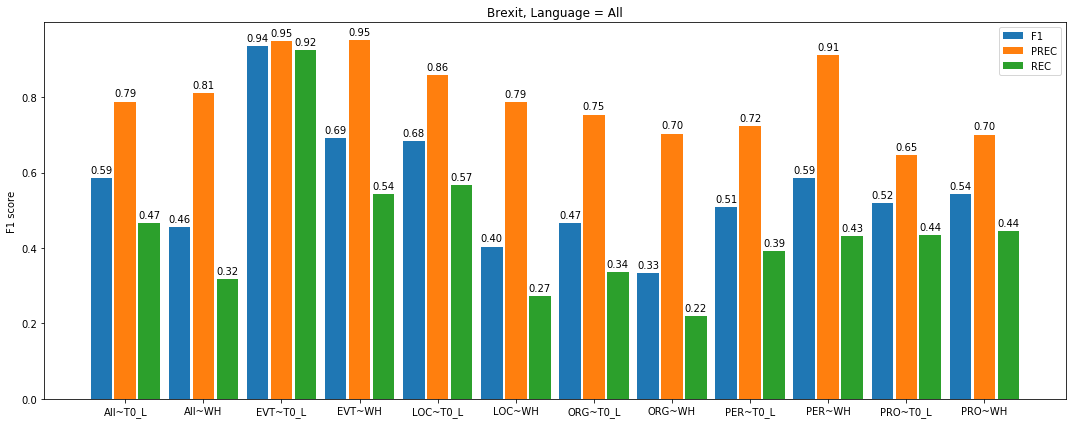

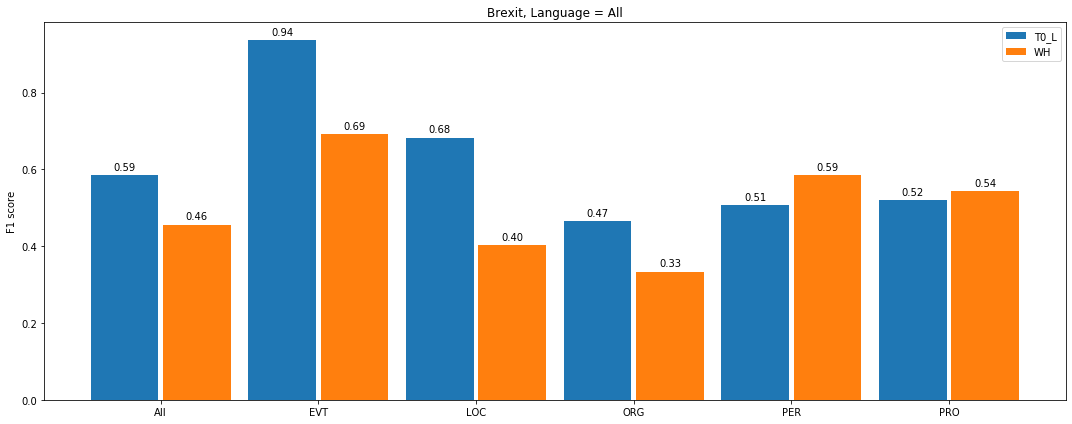

In [10]:
#Rozdział 4.3.7
compare_methods(res+res2, langs=["All"], methods=["WH", "T0_L"])


Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All~WH   |F1       |0.456410 |0.810414 |26851    |0.317653 |26845    |Lea      |
All      |All~WH   |PREC     |0.810414 |0.810414 |26851    |0.317653 |26845    |Lea      |
All      |All~WH   |REC      |0.317653 |0.810414 |26851    |0.317653 |26845    |Lea      |
--------------------------------------------------------------
All      |All~WH_F |F1       |0.489750 |0.793179 |26851    |0.354237 |26845    |Lea      |
All      |All~WH_F |PREC     |0.793179 |0.793179 |26851    |0.354237 |26845    |Lea      |
All      |All~WH_F |REC      |0.354237 |0.793179 |26851    |0.354237 |26845    |Lea      |
--------------------------------------------------------------
All      |EVT~WH   |F1       |0.691742 |0.950602 |2574     |0.543689 |2576     |Lea      |
All      |EVT~WH   |PREC     |0.950602 |0.950602 |2574     |0.543689 |2576     |Le

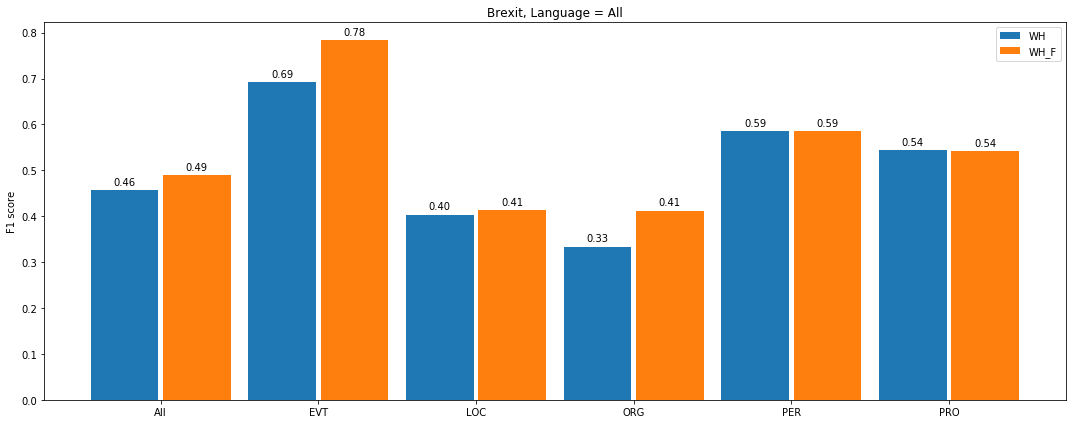

In [11]:
#Rozdział 4.3.8
compare_methods(res+res2, langs=["All"], methods=["WH_F", "WH"])

# Comparision of different threshold

In [5]:
from itertools import product
from solvers import null_solver, prophecy, type0, wikidata, wikidata2, prych
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
import common
import importlib
importlib.reload(common)
importlib.reload(repository)
meth = {}
idd_cached = common.CacheAndSkipSecondPass(identifier.Identifier(gl_rep))
for t in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    conf = []
    for l,cat in product(["pl", "cs", "bg", "ru"], ["ORG", "EVT", "PER", "PRO", "LOC"]):
        conf += [{"lang": l, "cat": cat, "th": t}]
    sep_fixer = simplefixer.SeparateFixer(gl_rep, conf)
    meth["FIX_"+str(t)] = {
              "identifier": idd_cached, 
               "answer_fixer": sep_fixer}

  0%|          | 0/9 [00:00<?, ?it/s]WARNING: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/fixers/simplefixer.py:34: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / np.linalg.norm(v1)


simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Using stripped file
Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5426.4 MiB   5426.4 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5426.4 MiB      0.0 MiB           if lang not in self.fasttext:
    54   5426.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55   5426.4 MiB      0.0 MiB               while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
 


simple fixer: 100%|██████████| 579/579 [02:21<00:00,  4.09it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5426.4 MiB   5426.4 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5426.4 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 15.18it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5426.4 MiB   5426.4 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5426.4 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 663/663 [02:12<00:00,  5.02it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5426.4 MiB   5426.4 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5426.4 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 243/243 [00:07<00:00, 30.80it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5426.4 MiB   5426.4 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5426.4 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 396/396 [03:52<00:00,  1.71it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Using stripped file
Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5450.7 MiB   5450.7 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5450.7 MiB      0.0 MiB           if lang not in self.fasttext:
    54   5450.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55   5450.7 MiB      0.0 MiB               while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
 


simple fixer: 100%|██████████| 230/230 [00:15<00:00, 15.08it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5450.7 MiB   5450.7 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5450.7 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 49.97it/s][A

simple fixer:   1%|          | 3/273 [00:00<00:12, 22.31it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5450.7 MiB   5450.7 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5450.7 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 273/273 [00:22<00:00, 12.27it/s] 

simple fixer:   4%|▍         | 4/95 [00:00<00:02, 38.26it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5450.7 MiB   5450.7 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5450.7 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 95/95 [00:00<00:00, 97.43it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5450.7 MiB   5450.7 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5450.7 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.75it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Using stripped file
Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5454.9 MiB   5454.9 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5454.9 MiB      0.0 MiB           if lang not in self.fasttext:
    54   5454.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55   5454.9 MiB      0.0 MiB               while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
 


simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.38it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5454.9 MiB   5454.9 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5454.9 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 62.95it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5454.9 MiB   5454.9 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5454.9 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 147/147 [00:28<00:00,  5.24it/s]

simple fixer:  12%|█▏        | 7/59 [00:00<00:00, 67.51it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5454.9 MiB   5454.9 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5454.9 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 169.37it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5454.9 MiB   5454.9 MiB       @profile
    52                                 def get_fasttext_for_lang(self, lang):
    53   5454.9 MiB      0.0 MiB           if lang not in self.fasttext:
    54                                         mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    55                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    56                                             d = choice(list(self.fasttext.keys()))
    57                                             self.fasttext.pop(d)
    58                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    59                                             print("removing element from fasttext cache")
    60               


simple fixer: 100%|██████████| 62/62 [00:04<00:00, 12.55it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Using stripped file
Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5472.8 MiB   5472.8 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5472.8 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54   5472.8 MiB      0.0 MiB               while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55   5472.8 MiB      0.0 MiB                   d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60       


simple fixer: 100%|██████████| 264/264 [01:36<00:00,  2.74it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5485.5 MiB   5485.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5485.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.71it/s][A

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5485.5 MiB   5485.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5485.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [01:50<00:00,  2.94it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5485.7 MiB   5485.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5485.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 32.50it/s][A

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5485.7 MiB   5485.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5485.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:36<00:00,  2.33it/s]

simple fixer: 100%|██████████| 579/579 [02:28<00:00,  3.90it/s] 

simple fixer: 100%|██████████| 46/46 [00:02<00:00, 15.40it/s]

simple fixer:   3%|▎         | 19/663 [00:38<08:35,  1.25it/s]


simple fixer: 100%|██████████| 663/663 [02:07<00:00,  5.21it/s] 

simple fixer: 100%|██████████| 243/243 [00:07<00:00, 30.67it/s] 

simple fixer:   3%|▎         | 10/396 [01:57<30:58,  4.81s/it]


simple fixer: 100%|██████████| 396/396 [03:31<00:00,  1.87it/s] 

simple fixer: 100%|██████████| 230/230 [00:15<00:00, 14.47it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 46.68it/s][A

simple fixer: 100%|██████████| 273/273 [00:22<00:00, 12.22it/s] 

simple fixer: 100%|██████████| 95/95 [00:01<00:00, 93.98it/s]

simple fixer:  62%|██████▏   | 94/152 [00:26<00:01, 44.80it/s]


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.68it/s]

simple fixer: 100%|██████████| 264/264 [01:33<00:00,  2.82it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.92it/s][A

simple fixer: 100%|██████████| 326/326 [01:50<00:00,  2.95it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 33.74it/s]

simple fixer:  48%|████▊     | 108/226 [01:35<00:05, 21.88it/s]


simple fixer: 100%|██████████| 226/226 [01:36<00:00,  2.34it/s]

simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.90it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 62.95it/s][A

simple fixer: 100%|██████████| 147/147 [00:27<00:00,  5.28it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 150.55it/s][A

 11%|█         | 1/9 [49:57<6:39:38, 2997.31s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.2 MiB   5612.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:29<00:00,  3.88it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.2 MiB   5612.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.96it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.2 MiB   5612.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:09<00:00,  5.13it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.2 MiB   5612.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 29.23it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.2 MiB   5612.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [03:36<00:00,  1.83it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.2 MiB   5613.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:15<00:00, 14.56it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 42.58it/s][A

simple fixer:   1%|          | 3/273 [00:00<00:12, 21.55it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:22<00:00, 12.07it/s] 

simple fixer:   3%|▎         | 3/95 [00:00<00:03, 29.10it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:00<00:00, 95.99it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.83it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.4 MiB   5613.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.91it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.4 MiB   5613.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 61.25it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.4 MiB   5613.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:26<00:00,  5.47it/s]

simple fixer:   7%|▋         | 4/59 [00:00<00:01, 37.73it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.2 MiB   5613.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 154.93it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.2 MiB   5613.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:06<00:00,  9.43it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:37<00:00,  2.70it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.07it/s][A

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [01:52<00:00,  2.91it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 32.04it/s]

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:38<00:00,  2.30it/s]

simple fixer:  13%|█▎        | 73/579 [02:08<01:22,  6.14it/s]


simple fixer: 100%|██████████| 579/579 [02:28<00:00,  3.91it/s] 

simple fixer: 100%|██████████| 46/46 [00:02<00:00, 15.45it/s]

simple fixer:  34%|███▍      | 226/663 [01:54<00:30, 14.31it/s]


simple fixer: 100%|██████████| 663/663 [02:05<00:00,  5.28it/s] 

simple fixer: 100%|██████████| 243/243 [00:07<00:00, 31.76it/s] 

simple fixer: 100%|██████████| 396/396 [03:27<00:00,  1.91it/s] 

simple fixer:   8%|▊         | 19/230 [00:11<02:49,  1.24it/s]


simple fixer: 100%|██████████| 230/230 [00:15<00:00, 15.20it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 47.73it/s][A

simple fixer: 100%|██████████| 273/273 [00:22<00:00, 11.95it/s] 

simple fixer: 100%|██████████| 95/95 [00:01<00:00, 92.97it/s]

simple fixer: 100%|██████████| 152/152 [00:27<00:00,  5.55it/s]

simple fixer: 100%|██████████| 264/264 [01:36<00:00,  2.73it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.38it/s]

simple fixer:  21%|██        | 69/326 [01:46<01:12,  3.55it/s]


simple fixer: 100%|██████████| 326/326 [01:53<00:00,  2.87it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 33.42it/s]

simple fixer: 100%|██████████| 226/226 [01:35<00:00,  2.37it/s]

simple fixer: 100%|██████████| 169/169 [00:11<00:00, 15.30it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 66.21it/s][A

simple fixer: 100%|██████████| 147/147 [00:26<00:00,  5.47it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 170.73it/s][A

 22%|██▏       | 2/9 [1:21:47<5:11:37, 2671.11s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.3 MiB   5613.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:33<00:00,  3.78it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.1 MiB   5613.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.60it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.1 MiB   5613.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:11<00:00,  5.05it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.1 MiB   5613.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:07<00:00, 30.38it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5613.1 MiB   5613.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5613.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [03:30<00:00,  1.88it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:15<00:00, 14.66it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 30.44it/s][A

simple fixer:   1%|          | 3/273 [00:00<00:11, 23.23it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:21<00:00, 12.57it/s] 

simple fixer:   4%|▍         | 4/95 [00:00<00:02, 38.30it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:00<00:00, 98.29it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.9 MiB   5612.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:25<00:00,  5.85it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.7 MiB   5612.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.75it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.7 MiB   5612.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 47.56it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.7 MiB   5612.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:31<00:00,  4.73it/s]

simple fixer:   8%|▊         | 5/59 [00:00<00:01, 49.57it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.7 MiB   5612.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 163.12it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.7 MiB   5612.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:07<00:00,  7.82it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.4 MiB   5612.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:49<00:00,  2.42it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.4 MiB   5612.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 12.72it/s][A

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.4 MiB   5612.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [02:01<00:00,  2.68it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.4 MiB   5612.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 30.50it/s][A

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5612.4 MiB   5612.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5612.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:45<00:00,  2.13it/s]

simple fixer: 100%|██████████| 579/579 [02:32<00:00,  3.81it/s] 

simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.72it/s]

simple fixer:   1%|          | 6/663 [00:33<1:27:33,  8.00s/it]


simple fixer: 100%|██████████| 663/663 [02:06<00:00,  5.23it/s] 

simple fixer: 100%|██████████| 243/243 [00:07<00:00, 30.87it/s] 

simple fixer:   1%|          | 4/396 [01:47<2:29:17, 22.85s/it]


simple fixer: 100%|██████████| 396/396 [03:27<00:00,  1.91it/s] 

simple fixer: 100%|██████████| 230/230 [00:15<00:00, 14.96it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 32.76it/s][A

simple fixer: 100%|██████████| 273/273 [00:21<00:00, 12.64it/s] 

simple fixer: 100%|██████████| 95/95 [00:00<00:00, 96.88it/s]

simple fixer:  43%|████▎     | 66/152 [00:26<00:03, 22.15it/s]


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.73it/s]

simple fixer: 100%|██████████| 264/264 [01:36<00:00,  2.73it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.92it/s][A

simple fixer: 100%|██████████| 326/326 [01:50<00:00,  2.96it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 32.86it/s]

simple fixer:  39%|███▉      | 89/226 [01:35<00:11, 11.94it/s]


simple fixer: 100%|██████████| 226/226 [01:37<00:00,  2.33it/s]

simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.92it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 64.83it/s][A

simple fixer: 100%|██████████| 147/147 [00:27<00:00,  5.34it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 165.58it/s][A

 33%|███▎      | 3/9 [1:54:12<4:05:20, 2453.43s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5616.7 MiB   5616.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5616.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:30<00:00,  3.84it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5616.5 MiB   5616.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5616.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.78it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5616.5 MiB   5616.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5616.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:22<00:00,  4.65it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5616.5 MiB   5616.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5616.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 27.00it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5616.5 MiB   5616.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5616.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [04:23<00:00,  1.50it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:18<00:00, 12.21it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 25.47it/s][A

simple fixer:   1%|          | 2/273 [00:00<00:13, 19.84it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:27<00:00, 10.05it/s] 

simple fixer:   3%|▎         | 3/95 [00:00<00:03, 26.62it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:01<00:00, 85.10it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:33<00:00,  4.57it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:14<00:00, 11.79it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 52.71it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:31<00:00,  4.61it/s]

simple fixer:   7%|▋         | 4/59 [00:00<00:01, 39.77it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 150.24it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.2 MiB   5617.2 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.2 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:08<00:00,  7.00it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.1 MiB   5617.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:57<00:00,  2.25it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.1 MiB   5617.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 11.83it/s]

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.1 MiB   5617.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [02:06<00:00,  2.59it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.1 MiB   5617.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 30.21it/s][A

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5617.1 MiB   5617.1 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5617.1 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:51<00:00,  2.02it/s]

simple fixer:  12%|█▏        | 68/579 [02:33<02:53,  2.94it/s]


simple fixer: 100%|██████████| 579/579 [02:58<00:00,  3.25it/s] 

simple fixer: 100%|██████████| 46/46 [00:03<00:00, 12.23it/s]

simple fixer:  28%|██▊       | 183/663 [02:08<00:49,  9.78it/s]


simple fixer: 100%|██████████| 663/663 [02:23<00:00,  4.63it/s] 

simple fixer: 100%|██████████| 243/243 [00:08<00:00, 27.73it/s] 

simple fixer:  42%|████▏     | 168/396 [04:03<00:20, 11.26it/s]


simple fixer: 100%|██████████| 396/396 [04:06<00:00,  1.61it/s] 

simple fixer: 100%|██████████| 230/230 [00:18<00:00, 12.34it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 27.73it/s][A

simple fixer: 100%|██████████| 273/273 [00:25<00:00, 10.84it/s] 

simple fixer: 100%|██████████| 95/95 [00:01<00:00, 88.80it/s]

simple fixer: 100%|██████████| 152/152 [00:30<00:00,  4.96it/s]

simple fixer: 100%|██████████| 264/264 [01:58<00:00,  2.22it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 12.44it/s]

simple fixer:   5%|▍         | 15/326 [01:28<13:48,  2.66s/it]


simple fixer: 100%|██████████| 326/326 [02:05<00:00,  2.60it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 30.19it/s][A

simple fixer: 100%|██████████| 226/226 [01:58<00:00,  1.91it/s]

simple fixer: 100%|██████████| 169/169 [00:13<00:00, 12.35it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 53.76it/s][A

simple fixer: 100%|██████████| 147/147 [00:33<00:00,  4.42it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 146.76it/s][A

simple fixer:   6%|▋         | 4/62 [00:06<01:21,  1.41s/it]


 44%|████▍     | 4/9 [2:31:09<3:18:32, 2382.44s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [03:04<00:00,  3.14it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 13.23it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:32<00:00,  4.36it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:09<00:00, 26.45it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [04:16<00:00,  1.54it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5639.3 MiB   5639.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5639.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:19<00:00, 11.84it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5639.0 MiB   5639.0 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5639.0 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 25.47it/s][A

simple fixer:   1%|          | 2/273 [00:00<00:13, 19.55it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5639.0 MiB   5639.0 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5639.0 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:26<00:00, 10.37it/s] 

simple fixer:   3%|▎         | 3/95 [00:00<00:03, 26.85it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5639.0 MiB   5639.0 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5639.0 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:01<00:00, 71.66it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5639.0 MiB   5639.0 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5639.0 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:33<00:00,  4.56it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:13<00:00, 12.21it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 53.83it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:35<00:00,  4.12it/s]

simple fixer:   7%|▋         | 4/59 [00:00<00:01, 36.01it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 148.99it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.5 MiB   5638.5 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.5 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:08<00:00,  7.00it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.4 MiB   5638.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:58<00:00,  2.23it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.4 MiB   5638.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 12.52it/s]

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.4 MiB   5638.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [02:12<00:00,  2.47it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.4 MiB   5638.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 29.37it/s][A

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5638.4 MiB   5638.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5638.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:59<00:00,  1.89it/s]

simple fixer:  11%|█▏        | 66/579 [02:36<03:33,  2.40it/s]


simple fixer: 100%|██████████| 579/579 [03:02<00:00,  3.17it/s] 

simple fixer: 100%|██████████| 46/46 [00:03<00:00, 12.83it/s]

simple fixer:  28%|██▊       | 183/663 [01:58<00:48,  9.99it/s]


simple fixer: 100%|██████████| 663/663 [02:13<00:00,  4.96it/s] 

simple fixer: 100%|██████████| 243/243 [00:09<00:00, 25.68it/s] 

simple fixer:  41%|████      | 163/396 [03:57<00:22, 10.24it/s]


simple fixer: 100%|██████████| 396/396 [04:00<00:00,  1.64it/s] 

simple fixer: 100%|██████████| 230/230 [00:19<00:00, 11.91it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 25.23it/s][A

simple fixer: 100%|██████████| 273/273 [00:25<00:00, 10.70it/s] 

simple fixer: 100%|██████████| 95/95 [00:01<00:00, 79.18it/s]

simple fixer: 100%|██████████| 152/152 [00:33<00:00,  4.60it/s]

simple fixer: 100%|██████████| 264/264 [01:59<00:00,  2.20it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 12.82it/s][A

simple fixer:   1%|          | 3/326 [00:09<18:41,  3.47s/it]


simple fixer: 100%|██████████| 326/326 [02:06<00:00,  2.58it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 30.92it/s][A

simple fixer: 100%|██████████| 226/226 [01:44<00:00,  2.16it/s]

simple fixer: 100%|██████████| 169/169 [00:12<00:00, 13.85it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 60.18it/s][A

simple fixer:  47%|████▋     | 69/147 [00:28<00:03, 22.70it/s]


simple fixer: 100%|██████████| 147/147 [00:29<00:00,  5.05it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 158.42it/s][A

 56%|█████▌    | 5/9 [3:08:25<2:35:53, 2338.35s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.8 MiB   5608.8 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.8 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:34<00:00,  3.75it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.48it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:11<00:00,  5.04it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 29.17it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [03:55<00:00,  1.68it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.7 MiB   5608.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:19<00:00, 11.85it/s]

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.7 MiB   5608.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 24.85it/s][A

simple fixer:   1%|          | 2/273 [00:00<00:14, 19.24it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.7 MiB   5608.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:25<00:00, 10.69it/s] 

simple fixer:   3%|▎         | 3/95 [00:00<00:03, 28.25it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.7 MiB   5608.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:01<00:00, 88.87it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.7 MiB   5608.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:29<00:00,  5.12it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:12<00:00, 13.11it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 57.14it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:31<00:00,  4.64it/s]

simple fixer:   8%|▊         | 5/59 [00:00<00:01, 48.31it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 155.43it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:08<00:00,  7.40it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:54<00:00,  2.31it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 13.80it/s][A

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [02:01<00:00,  2.68it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 33.62it/s]

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5608.6 MiB   5608.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5608.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:44<00:00,  2.16it/s]

simple fixer: 100%|██████████| 579/579 [02:34<00:00,  3.76it/s] 

simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.94it/s]

simple fixer:   2%|▏         | 14/663 [00:37<14:35,  1.35s/it]


simple fixer: 100%|██████████| 663/663 [02:10<00:00,  5.09it/s] 

simple fixer: 100%|██████████| 243/243 [00:08<00:00, 29.33it/s] 

simple fixer:   1%|          | 3/396 [01:53<3:43:32, 34.13s/it]


simple fixer: 100%|██████████| 396/396 [03:38<00:00,  1.81it/s] 

simple fixer: 100%|██████████| 230/230 [00:15<00:00, 14.43it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 30.81it/s][A

simple fixer: 100%|██████████| 273/273 [00:21<00:00, 12.74it/s] 

simple fixer: 100%|██████████| 95/95 [00:00<00:00, 97.23it/s]

simple fixer:  33%|███▎      | 50/152 [00:25<00:08, 11.39it/s]


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.69it/s]

simple fixer: 100%|██████████| 264/264 [01:44<00:00,  2.52it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.21it/s][A

simple fixer: 100%|██████████| 326/326 [01:54<00:00,  2.85it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 33.19it/s]

simple fixer:  32%|███▏      | 72/226 [01:35<00:24,  6.17it/s]


simple fixer: 100%|██████████| 226/226 [01:38<00:00,  2.29it/s]

simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.46it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 61.50it/s][A

simple fixer: 100%|██████████| 147/147 [00:28<00:00,  5.18it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 168.12it/s][A

 67%|██████▋   | 6/9 [3:42:00<1:52:04, 2241.42s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.3 MiB   5609.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:29<00:00,  3.87it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.3 MiB   5609.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:02<00:00, 15.48it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.3 MiB   5609.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:06<00:00,  5.24it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.3 MiB   5609.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 30.34it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.3 MiB   5609.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [03:35<00:00,  1.83it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.9 MiB   5609.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:16<00:00, 13.99it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.9 MiB   5609.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 30.84it/s][A

simple fixer:   1%|          | 3/273 [00:00<00:12, 21.83it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.9 MiB   5609.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:22<00:00, 12.04it/s] 

simple fixer:   4%|▍         | 4/95 [00:00<00:02, 38.66it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.7 MiB   5609.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:00<00:00, 97.00it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.7 MiB   5609.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.72it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.4 MiB   5609.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.54it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.4 MiB   5609.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 61.62it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.4 MiB   5609.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:28<00:00,  5.12it/s]

simple fixer:  12%|█▏        | 7/59 [00:00<00:00, 67.31it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.4 MiB   5609.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 171.38it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.4 MiB   5609.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:07<00:00,  8.14it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.6 MiB   5609.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:41<00:00,  2.59it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.6 MiB   5609.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.96it/s][A

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.6 MiB   5609.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [01:53<00:00,  2.88it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.6 MiB   5609.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:04<00:00, 31.11it/s]

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5609.6 MiB   5609.6 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5609.6 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [01:38<00:00,  2.29it/s]

simple fixer: 100%|██████████| 579/579 [02:45<00:00,  3.49it/s] 

simple fixer: 100%|██████████| 46/46 [00:03<00:00, 15.28it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]


simple fixer: 100%|██████████| 663/663 [02:12<00:00,  4.99it/s] 

simple fixer:  45%|████▌     | 110/243 [00:07<00:02, 47.73it/s]


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 29.33it/s] 

simple fixer: 100%|██████████| 396/396 [03:54<00:00,  1.69it/s] 

simple fixer: 100%|██████████| 230/230 [00:17<00:00, 12.90it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 28.21it/s][A

simple fixer: 100%|██████████| 273/273 [00:22<00:00, 12.14it/s] 

simple fixer: 100%|██████████| 95/95 [00:00<00:00, 101.33it/s][A

simple fixer:  12%|█▏        | 18/152 [00:26<01:00,  2.20it/s]


simple fixer: 100%|██████████| 152/152 [00:28<00:00,  5.27it/s]

simple fixer: 100%|██████████| 264/264 [01:42<00:00,  2.57it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.72it/s][A

simple fixer: 100%|██████████| 326/326 [01:50<00:00,  2.95it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 34.22it/s]

simple fixer:  26%|██▌       | 59/226 [01:41<00:27,  6.16it/s]


simple fixer: 100%|██████████| 226/226 [01:47<00:00,  2.11it/s]

simple fixer: 100%|██████████| 169/169 [00:13<00:00, 12.35it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 52.56it/s]

simple fixer: 100%|██████████| 147/147 [00:27<00:00,  5.26it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 170.05it/s][A

 78%|███████▊  | 7/9 [4:15:03<1:12:08, 2164.05s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 



simple fixer:   0%|          | 0/579 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.3 MiB   5610.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 579/579 [02:44<00:00,  3.51it/s] 

simple fixer:   0%|          | 0/46 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.3 MiB   5610.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 13.70it/s]

simple fixer:   0%|          | 0/663 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.3 MiB   5610.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 663/663 [02:11<00:00,  5.03it/s] 

simple fixer:   0%|          | 0/243 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.3 MiB   5610.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 29.78it/s] 

simple fixer:   0%|          | 0/396 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.3 MiB   5610.3 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.3 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 396/396 [03:51<00:00,  1.71it/s] 

simple fixer:   0%|          | 0/230 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 230/230 [00:17<00:00, 13.10it/s] 

simple fixer:   0%|          | 0/14 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 14/14 [00:00<00:00, 30.12it/s][A

simple fixer:   1%|          | 3/273 [00:00<00:12, 22.02it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 273/273 [00:23<00:00, 11.45it/s] 

simple fixer:   4%|▍         | 4/95 [00:00<00:02, 37.36it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 95/95 [00:01<00:00, 92.13it/s]

simple fixer:   0%|          | 0/152 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.4 MiB   5610.4 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.4 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 152/152 [00:28<00:00,  5.35it/s]

simple fixer:   0%|          | 0/169 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.9 MiB   5610.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 169/169 [00:12<00:00, 13.97it/s]

simple fixer:   0%|          | 0/36 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.9 MiB   5610.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 36/36 [00:00<00:00, 59.64it/s][A

simple fixer:   0%|          | 0/147 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.9 MiB   5610.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 147/147 [00:29<00:00,  5.05it/s]

simple fixer:  12%|█▏        | 7/59 [00:00<00:00, 69.20it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.9 MiB   5610.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 59/59 [00:00<00:00, 168.04it/s][A

simple fixer:   0%|          | 0/62 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.9 MiB   5610.9 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.9 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 62/62 [00:07<00:00,  8.18it/s]

simple fixer:   0%|          | 0/264 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 264/264 [01:54<00:00,  2.30it/s] 

simple fixer:   0%|          | 0/31 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 31/31 [00:02<00:00, 11.77it/s]

simple fixer:   0%|          | 0/326 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 326/326 [02:20<00:00,  2.32it/s] 

simple fixer:   0%|          | 0/146 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 146/146 [00:05<00:00, 29.02it/s]

simple fixer:   0%|          | 0/226 [00:00<?, ?it/s]

Filename: /media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/solvers/wikidatan/repository.py

Line #    Mem usage    Increment   Line Contents
    51   5610.7 MiB   5610.7 MiB       def get_fasttext_for_lang(self, lang):
    52                                     if lang not in self.fasttext:
    53   5610.7 MiB      0.0 MiB               mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    54                                         while len(self.fasttext) > 0 and mem_avail_gib < 5:
    55                                             d = choice(list(self.fasttext.keys()))
    56                                             self.fasttext.pop(d)
    57                                             mem_avail_gib = psutil.virtual_memory().available / 1024 / 1024 / 1024
    58                                             print("removing element from fasttext cache")
    59                             
    60                           


simple fixer: 100%|██████████| 226/226 [02:02<00:00,  1.85it/s]

simple fixer: 100%|██████████| 579/579 [02:54<00:00,  3.32it/s] 

simple fixer:   4%|▍         | 2/46 [00:03<01:23,  1.91s/it]


simple fixer: 100%|██████████| 46/46 [00:03<00:00, 14.04it/s]

simple fixer: 100%|██████████| 663/663 [02:20<00:00,  4.70it/s] 

simple fixer:  32%|███▏      | 77/243 [00:07<00:07, 21.94it/s]


simple fixer: 100%|██████████| 243/243 [00:08<00:00, 28.34it/s] 

simple fixer: 100%|██████████| 396/396 [03:53<00:00,  1.70it/s] 

simple fixer: 100%|██████████| 230/230 [00:17<00:00, 13.49it/s] 

simple fixer: 100%|██████████| 14/14 [00:00<00:00, 29.55it/s][A

simple fixer: 100%|██████████| 273/273 [00:23<00:00, 11.38it/s] 

simple fixer: 100%|██████████| 95/95 [00:00<00:00, 96.68it/s]

simple fixer:  11%|█         | 17/152 [00:24<01:14,  1.82it/s]


simple fixer: 100%|██████████| 152/152 [00:26<00:00,  5.67it/s]

simple fixer: 100%|██████████| 264/264 [01:41<00:00,  2.60it/s] 

simple fixer: 100%|██████████| 31/31 [00:02<00:00, 14.21it/s][A

simple fixer: 100%|██████████| 326/326 [01:57<00:00,  2.78it/s] 

simple fixer: 100%|██████████| 146/146 [00:04<00:00, 31.54it/s][A

simple fixer:  26%|██▌       | 59/226 [01:39<00:24,  6.91it/s]


simple fixer: 100%|██████████| 226/226 [01:44<00:00,  2.16it/s]

simple fixer: 100%|██████████| 169/169 [00:11<00:00, 14.35it/s]

simple fixer: 100%|██████████| 36/36 [00:00<00:00, 60.76it/s][A

simple fixer: 100%|██████████| 147/147 [00:28<00:00,  5.15it/s]

simple fixer: 100%|██████████| 59/59 [00:00<00:00, 166.46it/s][A

 89%|████████▉ | 8/9 [4:50:12<35:47, 2147.56s/it]  

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  answer_fixer <class 'solvers.fixers.simplefixer.SeparateFixer'>
Got exception 


100%|██████████| 9/9 [5:04:06<00:00, 2027.36s/it]

Flush on  ner <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  lemmatizer <class 'common.CacheAndSkipSecondPass'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
NER cached:  26137/27666
Lemma cached:  26137/27666
function [compare_identifier_methods] finished in 304 min 6 s 785 ms

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |FIX_0.6  |0.419551 |0.620766 |26851    |0.316848 |26855    |Lea      |
All      |All      |FIX_0.65 |0.467122 |0.671713 |26851    |0.358062 |26855    |Lea      |
All      |All      |FIX_0.7  |0.473401 |0.703143 |26851    |0.356816 |26855    |Lea      |
All      |All      |FIX_0.75 |0.478039 |0.737623 |26851    |0.353600 |26855    |Lea      |
All      |All      |FIX_0.8  |0.474638 |0.756755 |26851    |0.345745 |26855    |Lea      |
All      |All      |FIX_0.85 |

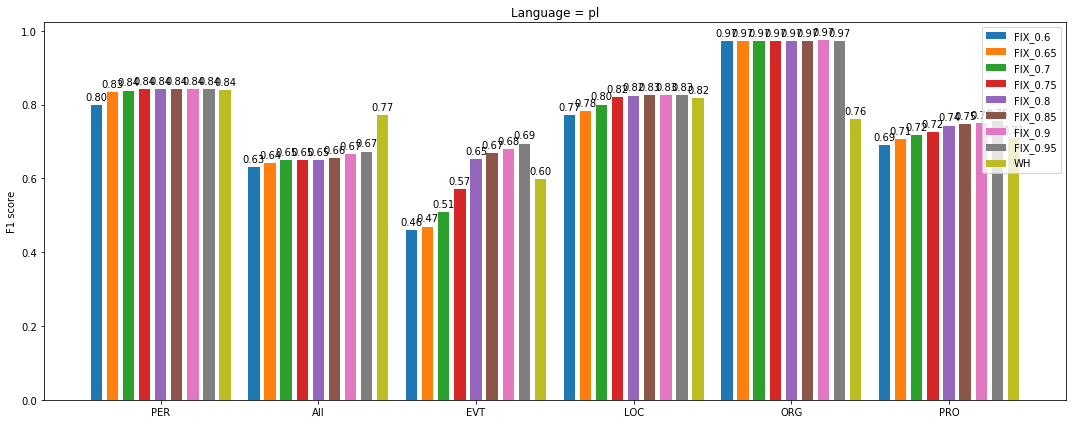

('cs', 'PER', 'FIX_0.6', 0.8277032744798328, 0.8959856076107411, 1104, 0.7690914422974768, 1103, 'Lea')


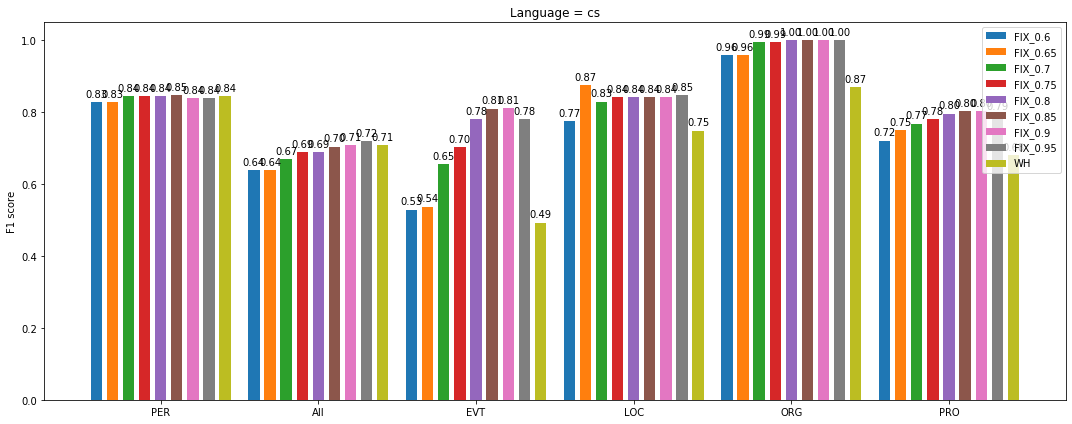

('ru', 'PER', 'FIX_0.6', 0.872068635348203, 0.9279095468842983, 1307, 0.822567151406762, 1307, 'Lea')


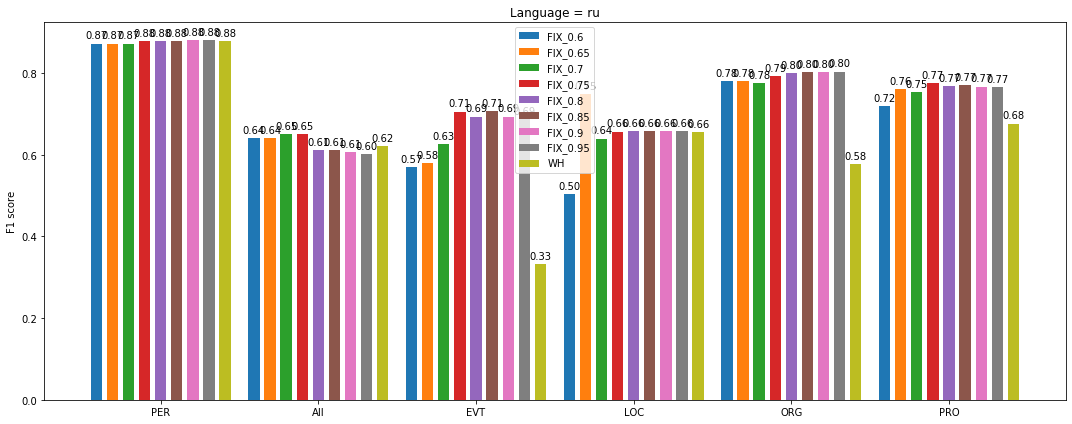

('bg', 'PER', 'FIX_0.6', 0.879770670550529, 0.872952067638521, 2515, 0.8866966318491257, 2515, 'Lea')


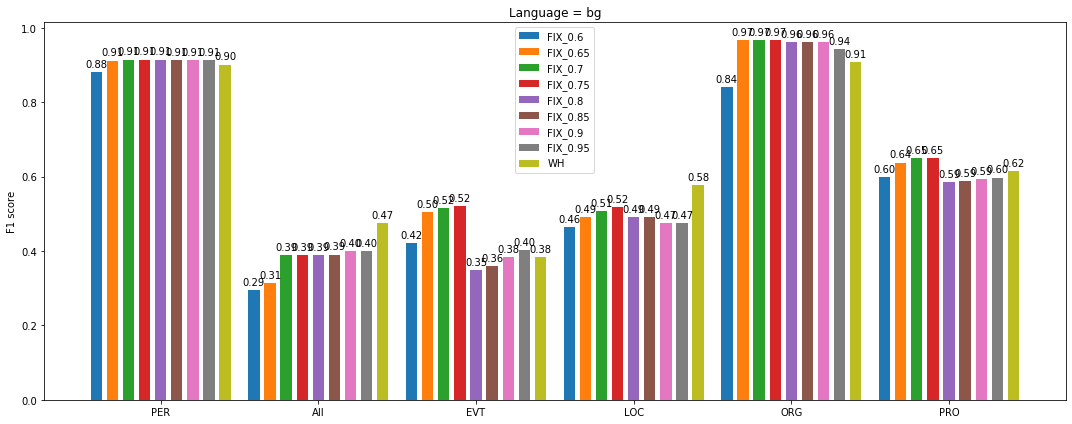

('All', 'PER', 'FIX_0.6', 0.5780297783874747, 0.8453440787263948, 7555, 0.43915909831898037, 7554, 'Lea')


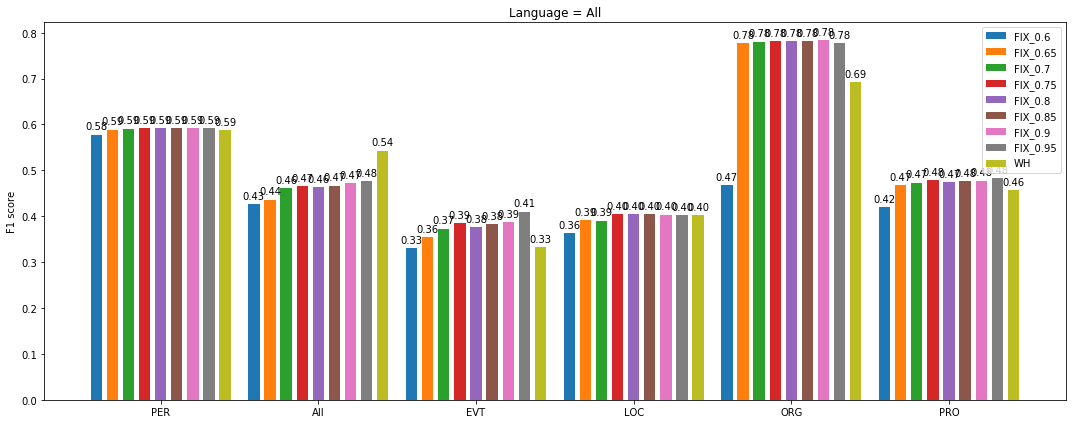

In [6]:
import common

res3 = common.compare_identifier_methods(
    ner = ner,
    lemma = lemma, 
    **meth,
    WH = {"identifier": identifier.Identifier(gl_rep)},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res3[0], res3[1:])

from visualize import visualize_compare_methods
# x = print(res + res2)

In [21]:
import importlib
from visualize import visualize_compare_methods
importlib.reload(visualize)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res3 if y[0] == sel_lang]
    visualize_compare_methods(sel_lang, x, plot_width=20) 
#pl: PER,      All,   EVT,   LOC, ORG, PRO
#    0.7984,0.6905, 0.971, 0.770,

NameError: name 'res3' is not defined

# Pokrycie fraz ze zbioru FastTextem

In [29]:

fixer3 = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
res4 = common.compare_identifier_methods(
    ner = ner,
    lemma = lemma,
    BSNLP = {"identifier": identifier.Identifier(gl_rep), 
             "answer_fixer": fixer3},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
x = print_stats(fixer3.statistics)
visualize_multiple_categories(x)

simple fixer:   3%|▎         | 61/1927 [24:03<1:07:50,  2.18s/it]  

KeyboardInterrupt: 